## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
country_fer = pd.read_csv("Foreign Exhcnage Rate.csv")

In [3]:
country_fer.head()

,Unnamed: 0,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,USA,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
1,CHINA,1.704542,1.892542,1.975675,2.320042,2.936658,3.452792,3.722100,3.722100,3.765108,4.783208,5.323392,5.514592,5.761958,8.618743,8.351417,8.314175,8.289817,8.278958,8.278250,8.278504,8.277068,8.276958,8.277037,8.276801,8.194317,7.973438,7.607532,6.948655,6.831416,6.770269,6.461461,6.312333,6.195758,6.143434,6.227489,6.644478,6.758755,6.615957,6.908385,NaN
2,INDIA,8.658523,9.455132,10.098898,11.362583,12.368750,12.610833,12.961500,13.917083,16.225500,17.503500,22.742433,25.918083,30.493292,31.373742,32.427077,35.433173,36.313286,41.259365,43.055428,44.941605,47.186414,48.610319,46.583284,45.316467,44.099975,45.307008,41.348533,43.505183,48.405267,45.725812,46.670467,53.437233,58.597845,61.029514,64.151944,67.195313,65.121569,68.389467,70.419969,NaN
3,JAPAN,220.535833,249.076667,237.511667,237.522500,238.535833,168.519833,144.637500,128.151667,137.964417,144.792500,134.706667,126.651333,111.197786,102.207806,94.059579,108.779057,120.990863,130.905301,113.906805,107.765498,121.528948,125.388019,115.933464,108.192569,110.218212,116.299312,117.753529,103.359494,93.570089,87.779875,79.807020,79.790455,97.595658,105.944781,121.044026,108.792900,112.166141,110.423179,109.009666,NaN
4,UK,0.497641,0.572447,0.659725,0.751807,0.779246,0.682197,0.611927,0.562170,0.611173,0.563177,0.567015,0.569774,0.666757,0.653427,0.633668,0.640958,0.610836,0.603824,0.618057,0.660931,0.694655,0.667223,0.612472,0.546180,0.549998,0.543487,0.499772,0.543966,0.641919,0.647179,0.624141,0.633047,0.639661,0.607730,0.654545,0.740634,0.776977,0.749532,0.783445,NaN


In [4]:
country_fer.shape

(7, 41)

In [5]:
FER = country_fer.T

In [6]:
FER.head()

,0,1,2,3,4,5,6
Unnamed: 0,USA,CHINA,INDIA,JAPAN,UK,SWITZERLAND,CANADA
1981,1,1.70454,8.65852,220.536,0.497641,1.96424,1.1989
1982,1,1.89254,9.45513,249.077,0.572447,2.03028,1.23374
1983,1,1.97568,10.0989,237.512,0.659725,2.09914,1.23241
1984,1,2.32004,11.3626,237.523,0.751807,2.34968,1.29507


In [7]:
new_header = FER.iloc[0] #grab the first row for the header
FER = FER[1:] #take the data less the header row
FER.columns = new_header #set the header row as the df header

In [8]:
FER.head()

Unnamed: 0,USA,CHINA,INDIA,JAPAN,UK,SWITZERLAND,CANADA
1981,1,1.70454,8.65852,220.536,0.497641,1.96424,1.1989
1982,1,1.89254,9.45513,249.077,0.572447,2.03028,1.23374
1983,1,1.97568,10.0989,237.512,0.659725,2.09914,1.23241
1984,1,2.32004,11.3626,237.523,0.751807,2.34968,1.29507
1985,1,2.93666,12.3688,238.536,0.779246,2.45713,1.36551


In [9]:
FER=FER.rename_axis(None, axis=1).rename_axis('YEAR', axis=0)
FER['year']=FER.index
FER_new = FER.iloc[1:]

In [10]:
FER_new.head()

,USA,CHINA,INDIA,JAPAN,UK,SWITZERLAND,CANADA,year
YEAR,,,,,,,,
1982,1,1.89254,9.45513,249.077,0.572447,2.03028,1.23374,1982
1983,1,1.97568,10.0989,237.512,0.659725,2.09914,1.23241,1983
1984,1,2.32004,11.3626,237.523,0.751807,2.34968,1.29507,1984
1985,1,2.93666,12.3688,238.536,0.779246,2.45713,1.36551,1985
1986,1,3.45279,12.6108,168.52,0.682197,1.79892,1.38947,1986


In [11]:
useful_columns = ['CHINA','INDIA','JAPAN','UK','SWITZERLAND','CANADA','year']
FER_new.loc[:,useful_columns].to_csv('six_countries_FER.csv', index = False)

In [12]:
FER_new = pd.read_csv("six_countries_FER.csv")
FER_new.head()

,CHINA,INDIA,JAPAN,UK,SWITZERLAND,CANADA,year
0,1.892542,9.455132,249.076667,0.572447,2.030275,1.233735,1982
1,1.975675,10.098898,237.511667,0.659725,2.099142,1.232412,1983
2,2.320042,11.362583,237.522500,0.751807,2.349683,1.295066,1984
3,2.936658,12.368750,238.535833,0.779246,2.457125,1.365507,1985
4,3.452792,12.610833,168.519833,0.682197,1.798917,1.389471,1986


## Data exploration

In [13]:
FER_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CHINA        38 non-null     float64
 1   INDIA        38 non-null     float64
 2   JAPAN        38 non-null     float64
 3   UK           38 non-null     float64
 4   SWITZERLAND  38 non-null     float64
 5   CANADA       38 non-null     float64
 6   year         39 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 2.3 KB


In [14]:
## From the info we found that every column datatype is of foat64 type

In [15]:
FER_new.isnull().sum()

CHINA          1
INDIA          1
JAPAN          1
UK             1
SWITZERLAND    1
CANADA         1
year           0
dtype: int64

In [16]:
FER_new = FER_new.dropna()

In [17]:
FER_new

,CHINA,INDIA,JAPAN,UK,SWITZERLAND,CANADA,year
0,1.892542,9.455132,249.076667,0.572447,2.030275,1.233735,1982
1,1.975675,10.098898,237.511667,0.659725,2.099142,1.232412,1983
2,2.320042,11.362583,237.522500,0.751807,2.349683,1.295066,1984
3,2.936658,12.368750,238.535833,0.779246,2.457125,1.365507,1985
4,3.452792,12.610833,168.519833,0.682197,1.798917,1.389471,1986
5,3.722100,12.961500,144.637500,0.611927,1.491192,1.325983,1987
6,3.722100,13.917083,128.151667,0.562170,1.463300,1.230701,1988
7,3.765108,16.225500,137.964417,0.611173,1.635925,1.183972,1989
8,4.783208,17.503500,144.792500,0.563177,1.389158,1.166774,1990
9,5.323392,22.742433,134.706667,0.567015,1.433992,1.145726,1991


In [18]:
FER_new.isnull().sum()

CHINA          0
INDIA          0
JAPAN          0
UK             0
SWITZERLAND    0
CANADA         0
year           0
dtype: int64

In [19]:
FER_new.describe()

,CHINA,INDIA,JAPAN,UK,SWITZERLAND,CANADA,year
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,6.296883,38.725338,127.960016,0.636202,1.374571,1.266777,2000.500000
std,2.027707,18.327540,42.963562,0.071393,0.390702,0.152017,11.113055
min,1.892542,9.455132,79.790455,0.499772,0.888042,0.989258,1982.000000
25%,5.371192,23.536345,107.872266,0.580291,1.052952,1.150988,1991.250000
50%,6.701617,43.280306,114.920135,0.633358,1.357172,1.292577,2000.500000
75%,8.276919,48.100554,130.216893,0.665300,1.499414,1.365631,2009.750000
max,8.618743,70.419969,249.076667,0.783445,2.457125,1.570343,2019.000000


#### decribe will give us the statistical inference of our dataset. From it one can find the minimum FER, Max FER MEan FER of a particular country.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, "distribution of CHINA's FER")

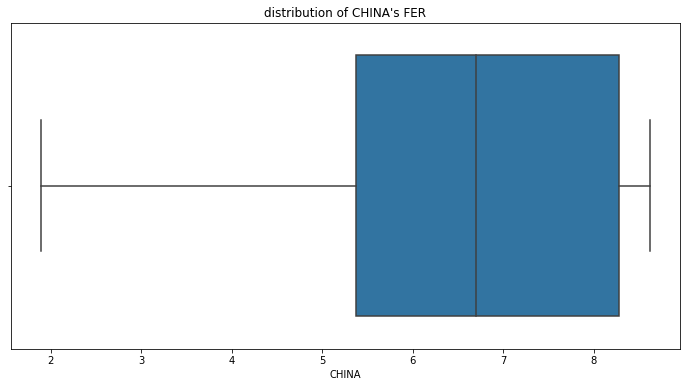

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(FER_new['CHINA'])
plt.title("distribution of CHINA's FER")

In [22]:
q0,q1,q2,q3,q4=np.percentile(FER_new['CHINA'],[0,25,50,75,100])
IQR=q3-q1
print("0th percentile of CHINA cloumn : ",q0)
print("25th percentile of CHINA cloumn : ",q1)
print("50th percentile of CHINA cloumn : ",q2)
print("75th percentile of CHINA cloumn : ",q3)
print("100th percentile of CHINA cloumn : ",q4)
print("Inter quartile range of CHINA cloumn : ",IQR)

0th percentile of CHINA cloumn :  1.892542
25th percentile of CHINA cloumn :  5.371192000000001
50th percentile of CHINA cloumn :  6.7016165
75th percentile of CHINA cloumn :  8.27691875
100th percentile of CHINA cloumn :  8.618742999999998
Inter quartile range of CHINA cloumn :  2.9057267499999995


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, "distribution of INDIA's FER")

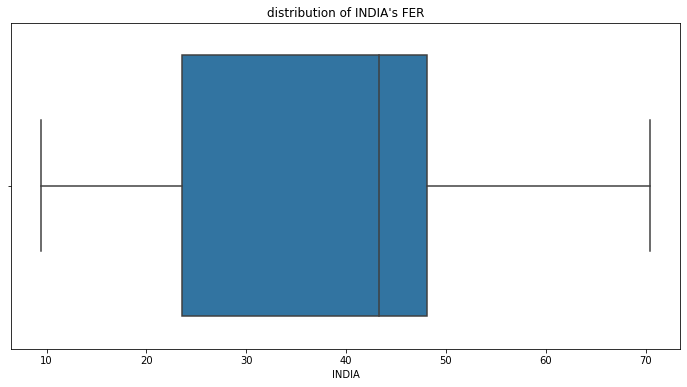

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(FER_new['INDIA'])
plt.title("distribution of INDIA's FER")

In [24]:
q0,q1,q2,q3,q4=np.percentile(FER_new['INDIA'],[0,25,50,75,100])
IQR=q3-q1
print("0th percentile of INDIA cloumn : ",q0)
print("25th percentile of INDIA cloumn : ",q1)
print("50th percentile of INDIA cloumn : ",q2)
print("75th percentile of INDIA cloumn : ",q3)
print("100th percentile of INDIA cloumn : ",q4)
print("Inter quartile range of INDIA cloumn : ",IQR)

0th percentile of INDIA cloumn :  9.455132
25th percentile of INDIA cloumn :  23.536345499999996
50th percentile of INDIA cloumn :  43.280305500000004
75th percentile of INDIA cloumn :  48.10055375
100th percentile of INDIA cloumn :  70.419969
Inter quartile range of INDIA cloumn :  24.564208250000007


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, "distribution of JAPAN's FER")

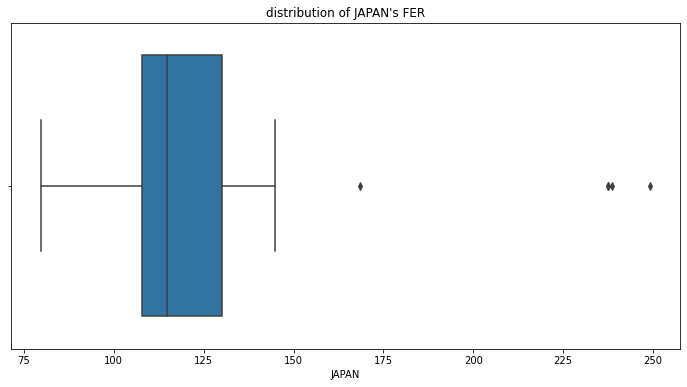

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(FER_new['JAPAN'])
plt.title("distribution of JAPAN's FER")

In [26]:
q0,q1,q2,q3,q4=np.percentile(FER_new['JAPAN'],[0,25,50,75,100])
IQR=q3-q1
print("0th percentile of JAPAN cloumn : ",q0)
print("25th percentile of JAPAN cloumn : ",q1)
print("50th percentile of JAPAN cloumn : ",q2)
print("75th percentile of JAPAN cloumn : ",q3)
print("100th percentile of JAPAN cloumn : ",q4)
print("Inter quartile range of JAPAN cloumn : ",IQR)

0th percentile of JAPAN cloumn :  79.79045500000002
25th percentile of JAPAN cloumn :  107.87226575
50th percentile of JAPAN cloumn :  114.9201345
75th percentile of JAPAN cloumn :  130.2168925
100th percentile of JAPAN cloumn :  249.076667
Inter quartile range of JAPAN cloumn :  22.344626750000003


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'distribution of UK FER')

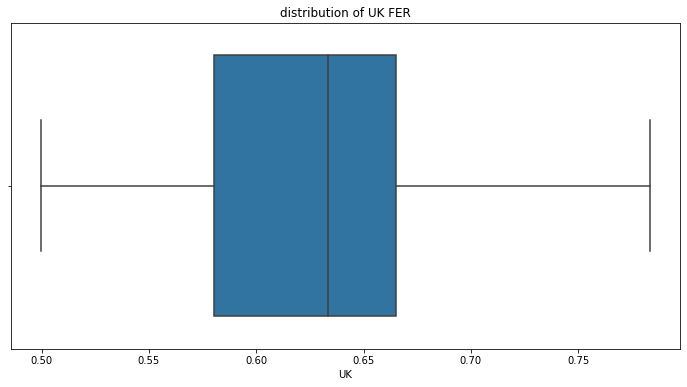

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(FER_new['UK'])
plt.title("distribution of UK FER")

In [28]:
q0,q1,q2,q3,q4=np.percentile(FER_new['UK'],[0,25,50,75,100])
IQR=q3-q1
print("0th percentile of UK cloumn : ",q0)
print("25th percentile of UK cloumn : ",q1)
print("50th percentile of UK cloumn : ",q2)
print("75th percentile of UK cloumn : ",q3)
print("100th percentile of UK cloumn : ",q4)
print("Inter quartile range of UK cloumn : ",IQR)

0th percentile of UK cloumn :  0.4997720000000001
25th percentile of UK cloumn :  0.58029125
50th percentile of UK cloumn :  0.6333575
75th percentile of UK cloumn :  0.6653005
100th percentile of UK cloumn :  0.783445
Inter quartile range of UK cloumn :  0.08500924999999993


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'distribution of SWITZERLAND FER')

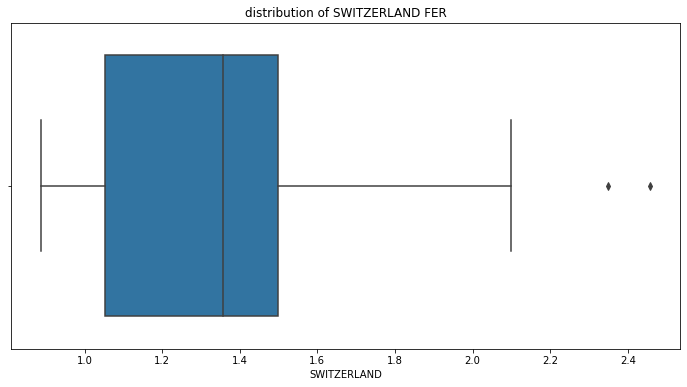

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(FER_new['SWITZERLAND'])
plt.title("distribution of SWITZERLAND FER")

In [30]:
q0,q1,q2,q3,q4=np.percentile(FER_new['SWITZERLAND'],[0,25,50,75,100])
IQR=q3-q1
print("0th percentile of SWITZERLAND cloumn : ",q0)
print("25th percentile of SWITZERLAND cloumn : ",q1)
print("50th percentile of SWITZERLAND column : ",q2)
print("75th percentile of SWITZERLAND cloumn : ",q3)
print("100th percentile of SWITZERLAND cloumn : ",q4)
print("Inter quartile range of SWITZERLAND cloumn : ",IQR)

0th percentile of SWITZERLAND cloumn :  0.888042
25th percentile of SWITZERLAND cloumn :  1.052952
50th percentile of SWITZERLAND column :  1.357172
75th percentile of SWITZERLAND cloumn :  1.4994142499999998
100th percentile of SWITZERLAND cloumn :  2.457125
Inter quartile range of SWITZERLAND cloumn :  0.4464622499999997


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'distribution of CANADA FER')

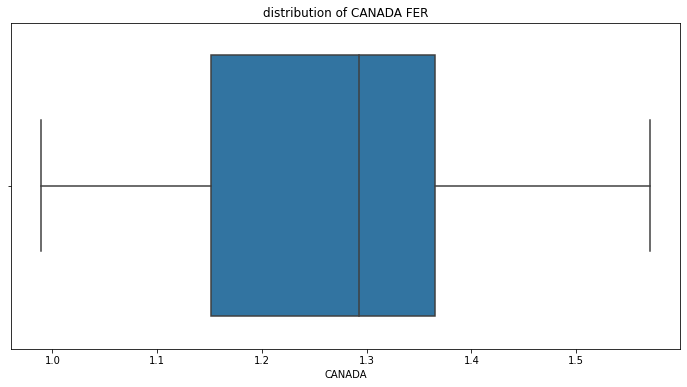

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(FER_new['CANADA'])
plt.title("distribution of CANADA FER")

In [32]:
q0,q1,q2,q3,q4=np.percentile(FER_new['CANADA'],[0,25,50,75,100])
IQR=q3-q1
print("0th percentile of CANADA cloumn : ",q0)
print("25th percentile of CANADA cloumn : ",q1)
print("50th percentile of CANADA cloumn : ",q2)
print("75th percentile of CANADA cloumn : ",q3)
print("100th percentile of CANADA cloumn : ",q4)
print("Inter quartile range of CANADA cloumn : ",IQR)

0th percentile of CANADA cloumn :  0.989258
25th percentile of CANADA cloumn :  1.1509880000000001
50th percentile of CANADA cloumn :  1.292577
75th percentile of CANADA cloumn :  1.3656314999999999
100th percentile of CANADA cloumn :  1.570343
Inter quartile range of CANADA cloumn :  0.21464349999999977


In [33]:
FER_new.corr()

,CHINA,INDIA,JAPAN,UK,SWITZERLAND,CANADA,year
CHINA,1.000000,0.657804,-0.774977,-0.147279,-0.570688,0.246403,0.575777
INDIA,0.657804,1.000000,-0.686436,0.248341,-0.776589,-0.054742,0.969982
JAPAN,-0.774977,-0.686436,1.000000,0.186534,0.872610,0.185730,-0.704906
UK,-0.147279,0.248341,0.186534,1.000000,0.156857,0.373912,0.174764
SWITZERLAND,-0.570688,-0.776589,0.872610,0.156857,1.000000,0.420654,-0.840039
CANADA,0.246403,-0.054742,0.185730,0.373912,0.420654,1.000000,-0.262291
year,0.575777,0.969982,-0.704906,0.174764,-0.840039,-0.262291,1.000000


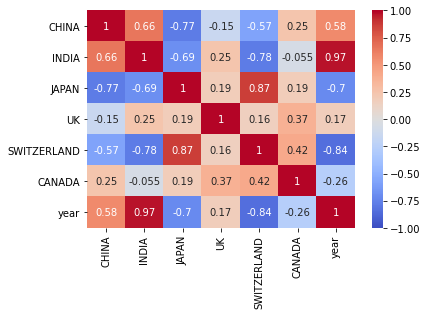

In [34]:
sns.heatmap(FER_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

### Heatmap with dark colors shows positive relationship between fers of different countries and light color shows the inverse relationship between countries.
- SWITZERLAND and JAPAN has the positive relationship over FER over the years followed by INDIA and CHINA similarly INDIA and SWITZERLAND has the inverser FER over years.


## Ploting line graph against year for each counties

Text(0.5, 1.0, 'FER of china')

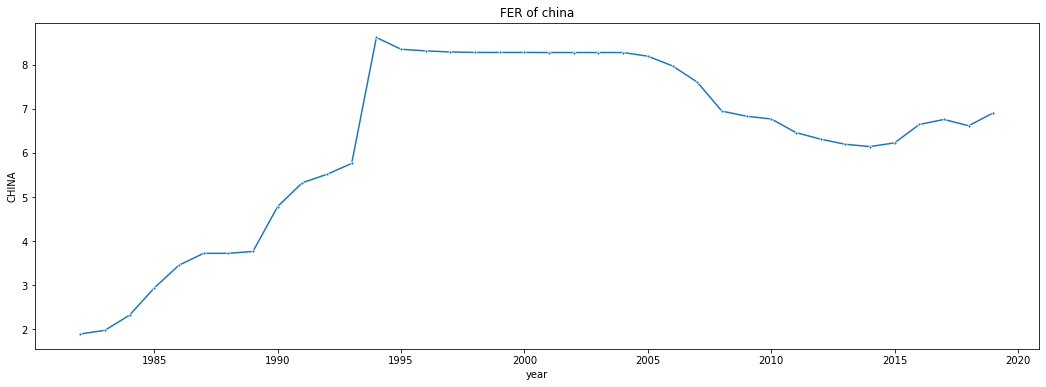

In [35]:
plt.figure(figsize=(18,6))
sns.lineplot(x=FER_new['year'],y=FER_new['CHINA'],marker='.')
plt.title("FER of china")

#### line chart of GDP of China shows that it starts increasing from 1981- 1987 with a  slight decrease in the year 1988 and again increase with much increase in 1989 and keeps on increasing till 1994 with a sudden decreases till year 1996 and remains stable till 2005. It fluctuate till 2015 and then it increases. 

Text(0.5, 1.0, 'FER of India')

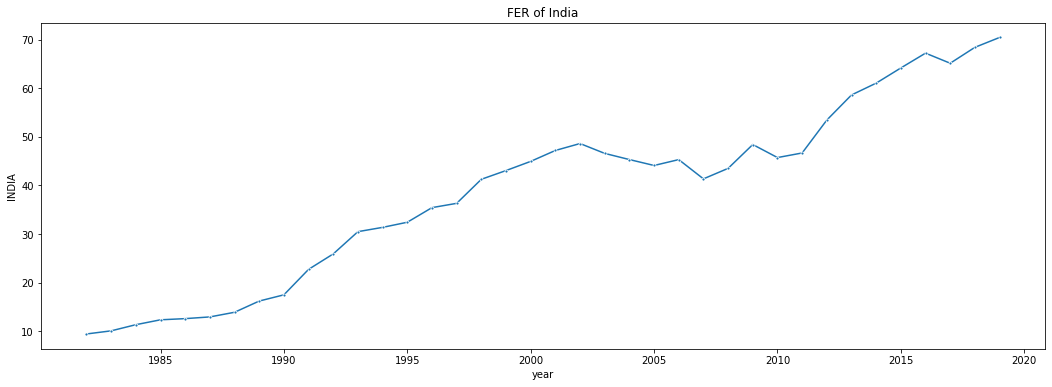

In [36]:
plt.figure(figsize=(18,6))
sns.lineplot(x=FER_new['year'],y=FER_new['INDIA'],marker='.')
plt.title("FER of India")

#### line graph of FER of India shows that it keeps on fluctuating between increasing and decreasing of FER.





Text(0.5, 1.0, 'FER of Japan')

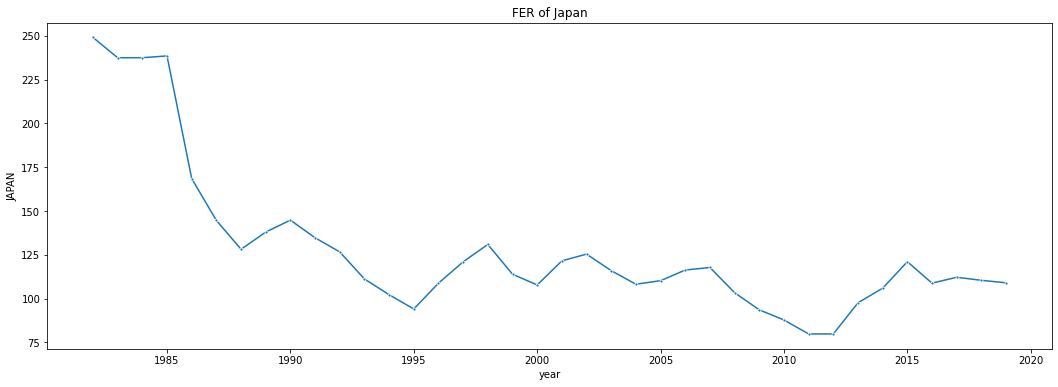

In [37]:
plt.figure(figsize=(18,6))
sns.lineplot(x=FER_new['year'],y=FER_new['JAPAN'],marker='.')
plt.title("FER of Japan")

Text(0.5, 1.0, 'FER of UK')

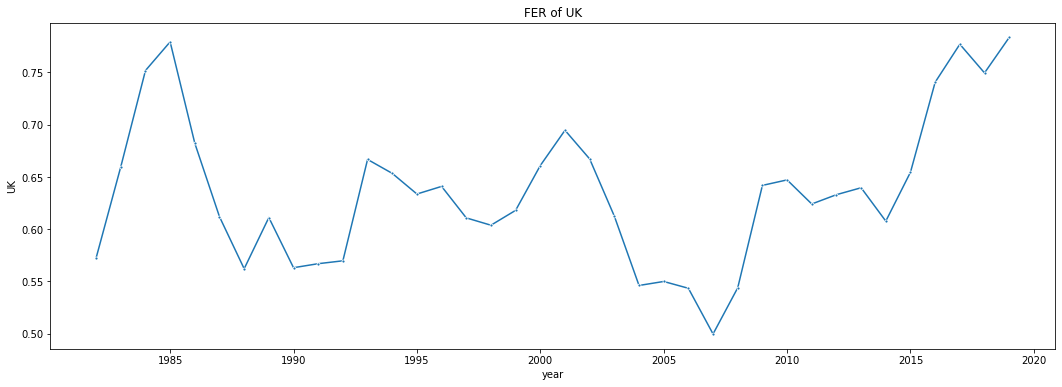

In [38]:
plt.figure(figsize=(18,6))
sns.lineplot(x=FER_new['year'],y=FER_new['UK'],marker='.')
plt.title("FER of UK")

Text(0.5, 1.0, 'FER of SWITZERLAND')

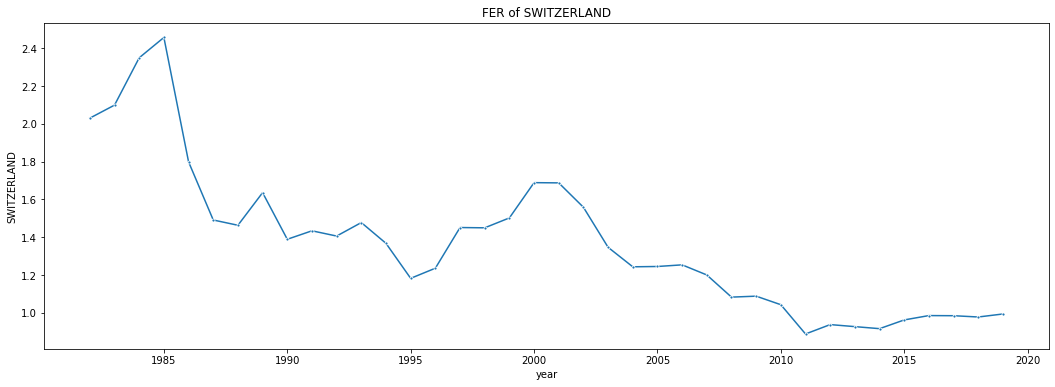

In [39]:
plt.figure(figsize=(18,6))
sns.lineplot(x=FER_new['year'],y=FER_new['SWITZERLAND'],marker='.')
plt.title("FER of SWITZERLAND")

Text(0.5, 1.0, 'FER of Canada')

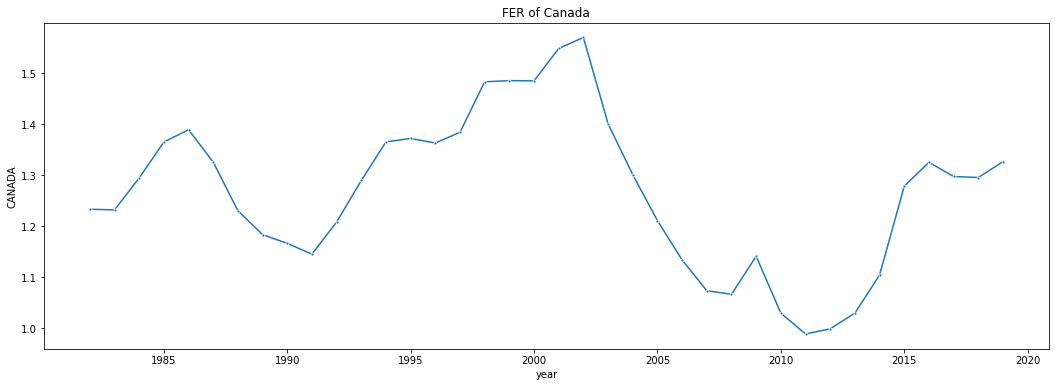

In [40]:
plt.figure(figsize=(18,6))
sns.lineplot(x=FER_new['year'],y=FER_new['CANADA'],marker='.')
plt.title("FER of Canada")

In [41]:
new_FER = FER_new
new_FER = new_FER.set_index('year')

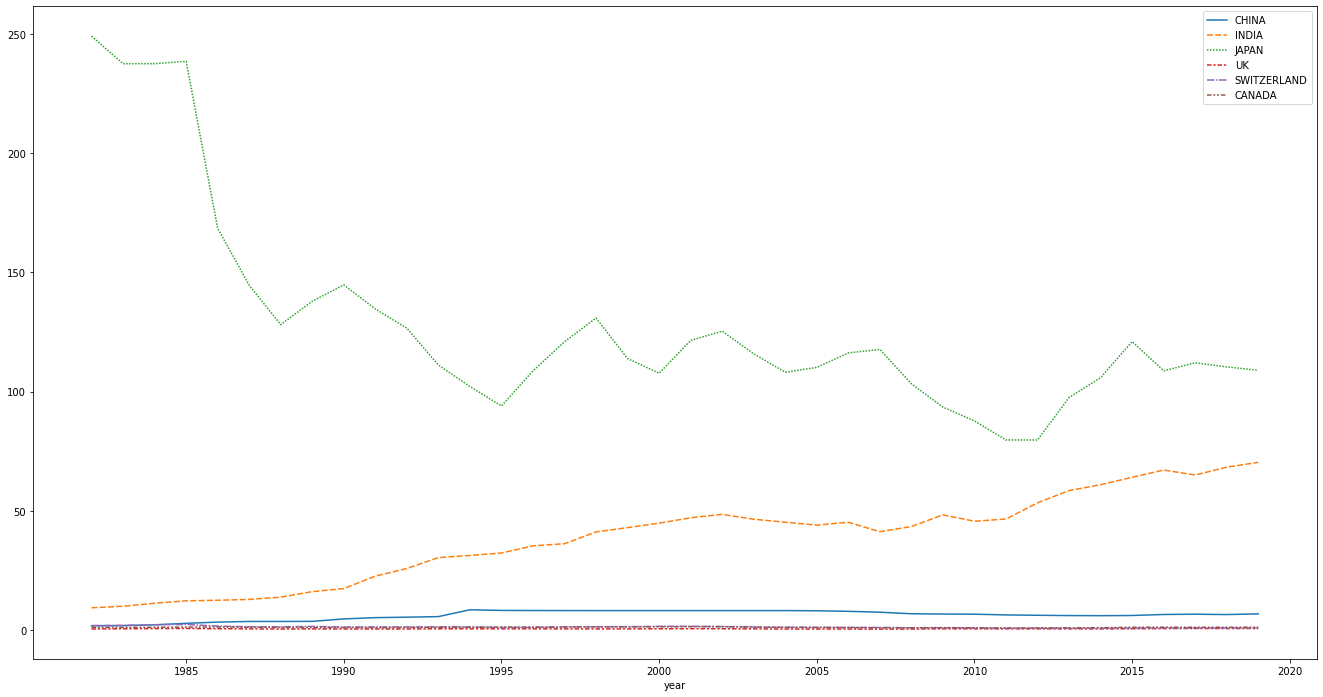

In [42]:
plt.figure(figsize = (23,12))
sns.lineplot(data = new_FER)

In [ ]:
pip install plotly==4.14.3

Note: you may need to restart the kernel to use updated packages.


In [43]:
import plotly
import plotly.offline as pyo
import plotly.graph_objs as go

In [50]:
pdata1=[go.Scatter(x=FER_new['year'],y=FER_new['CHINA'],mode='lines',name="line")]
layout1=go.Layout(title="china FER" , xaxis=dict(title='YEAR'),yaxis=dict(title='FER'))
figure1=go.Figure(data=pdata1,layout=layout1)
pyo.plot(figure1, filename = 'CHINA_FER.html')

'CHINA_FER.html'

In [51]:
pdata2=[go.Scatter(x=FER_new['year'],y=FER_new['INDIA'],mode='lines',name="line")]
layout2=go.Layout(title="INDIA FER" , xaxis=dict(title='YEAR'),yaxis=dict(title='FER'))
figure2=go.Figure(data=pdata2,layout=layout2)
pyo.plot(figure2, filename = 'INDIA_FER.html')

'INDIA_FER.html'

In [52]:
pdata3=[go.Scatter(x=FER_new['year'],y=FER_new['JAPAN'],mode='lines',name="line")]
layout3=go.Layout(title="JAPAN FER" , xaxis=dict(title='YEAR'),yaxis=dict(title='FER'))
figure3=go.Figure(data=pdata3,layout=layout3)
pyo.plot(figure3, filename = 'JAPAN_FER.html')

'JAPAN_FER.html'

In [53]:
pdata4=[go.Scatter(x=FER_new['year'],y=FER_new['UK'],mode='lines',name="line")]
layout4=go.Layout(title="UK FER" , xaxis=dict(title='YEAR'),yaxis=dict(title='FER'))
figure4=go.Figure(data=pdata4,layout=layout4)
pyo.plot(figure4, filename = 'UK_FER.html')

'UK_FER.html'

In [54]:
pdata5=[go.Scatter(x=FER_new['year'],y=FER_new['SWITZERLAND'],mode='lines',name="line")]
layout5=go.Layout(title="SWITZERLAND FER" , xaxis=dict(title='YEAR'),yaxis=dict(title='FER'))
figure5=go.Figure(data=pdata5,layout=layout5)
pyo.plot(figure5, filename = 'SWITZERLAND_FER.html')

'SWITZERLAND_FER.html'

In [55]:
pdata6=[go.Scatter(x=FER_new['year'],y=FER_new['CANADA'],mode='lines',name="line")]
layout6=go.Layout(title="CANADA FER" , xaxis=dict(title='YEAR'),yaxis=dict(title='FER'))
figure6=go.Figure(data=pdata6,layout=layout6)
pyo.plot(figure6, filename = 'CANADA_FER.html')

'CANADA_FER.html'